# Import Excel File

In [128]:
#install and import these libararies...
import pyodbc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import openpyxl
#magic function for inline charts in notebook
%matplotlib inline
#For chart style from matplotlib 
plt.style.use('fivethirtyeight')


In [129]:
xdf = pd.read_excel('addworks.xlsx')
xdf.head()

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales
0,Clothing,Caps,AWC Logo Cap,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,6.92,5.01,0.02,1.40,8.64,96.91,-28.13,14,68.79
1,Accessories,Locks,Cable Lock,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,10.31,15.00,0.00,0.00,25.00,61.88,28.12,6,90.00
2,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,15.67,22.79,0.00,0.00,37.99,125.37,56.98,8,182.35
3,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,London,England,Linda Martin,Amy Alberts,1,2012-06-30,15.67,20.89,0.05,16.72,37.99,250.73,66.86,16,317.60
4,Clothing,Gloves,"Full-Finger Gloves, M",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,15.67,22.79,0.00,0.00,37.99,109.70,49.86,7,159.56


In [10]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60880 entries, 0 to 60879
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   productcategory     60841 non-null  object        
 1   productsubcategory  60841 non-null  object        
 2   product             60841 non-null  object        
 3   saleterritory       60880 non-null  object        
 4   Country             60880 non-null  object        
 5   City                60880 non-null  object        
 6   Sate                60880 non-null  object        
 7   Customer            60880 non-null  object        
 8   Employee            60880 non-null  object        
 9   OrderCount          60880 non-null  int64         
 10  OrderDate           60880 non-null  datetime64[ns]
 11  StandardCost        60841 non-null  float64       
 12  UnitPrice           60880 non-null  float64       
 13  UnitPriceDiscount   60880 non-null  float64   

In [12]:
xdf.shape

(60880, 20)

In [19]:
xdf['Month_Year'] = xdf['OrderDate'].apply(lambda x: x.strftime('%Y- %m'))

In [20]:
xdf['Month_Year'].unique()

array(['2012- 06', '2012- 09', '2012- 12', '2013- 01', '2013- 02',
       '2013- 03', '2013- 04', '2013- 05', '2013- 06', '2013- 07',
       '2013- 08', '2013- 09', '2013- 10', '2013- 11', '2013- 12',
       '2014- 01', '2014- 02', '2014- 03', '2011- 05', '2011- 07',
       '2011- 08', '2011- 10', '2011- 12', '2012- 01', '2012- 02',
       '2012- 03', '2012- 04', '2012- 05', '2012- 07', '2012- 08',
       '2012- 10', '2012- 11', '2014- 05', '2014- 04'], dtype=object)

In [130]:
#Lets print some KPI's
print(
    "Total Sales: " + str('{:,.0f}'.format(round(xdf.Sales.sum()/1000)))
        + "Order Count: " + str('{:,.0f}'.format(round(xdf.OrderCount.sum()/1000)))
        + "Order Quantity: " + str('{:,.0f}'.format(round(xdf.OrderQuantity.sum()/1000)))
)

Total Sales: 80,488Order Count: 61Order Quantity: 215


# Overall Sales Trend


In [133]:
result = xdf.groupby('Month_Year').sum()

KeyError: 'Month_Year'

In [134]:
months = [month for month, xdf in xdf.groupby('Month_Year')]
plt.figure(figsize=(15,5))
plt.plot(months, result['Sales'], color= "#b80045")
plt.xticks(months, rotation='vertical', size= 8)
plt.ylabel('Sales in (USD)')
plt.xlabel('Months')
plt.show()


KeyError: 'Month_Year'

### Which are the Top 10 products by sales

In [37]:
prod_sales = xdf.groupby('product').sum()[['OrderQuantity', 'Sales']]
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)
#get top ten
pd.options.display.float_format = '{:,.2f}'.format
top_prods = prod_sales.head(10)
top_prods

C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_18592\977024899.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales = xdf.groupby('product').sum()[['OrderQuantity', 'Sales']]


,OrderQuantity,Sales
product,,
"Mountain-200 Black, 38",2395,"3,105,726.66"
"Mountain-200 Black, 42",2050,"2,646,352.67"
"Mountain-200 Silver, 38",1798,"2,354,215.23"
"Mountain-200 Silver, 42",1674,"2,181,044.29"
"Mountain-200 Silver, 46",1636,"2,133,156.84"
"Mountain-200 Black, 46",1491,"1,936,203.67"
"Road-250 Black, 44",1371,"1,888,480.05"
"Road-250 Black, 48",1200,"1,656,449.69"
"Road-350-W Yellow, 48",1390,"1,380,253.88"


In [36]:
ndf = xdf[['OrderDate', 'Sales']]

,OrderDate,Sales
0,2012-06-30,68.79
1,2012-06-30,90.00
2,2012-06-30,182.35
3,2012-06-30,317.60
4,2012-06-30,159.56
...,...,...
60875,2014-05-01,335.95
60876,2014-05-01,251.96
60877,2014-05-01,125.98
60878,2014-05-01,209.97


In [39]:
#add continuous date to dateframe to calculate same period last year data
new_df = ndf.groupby('OrderDate').sum().reset_index()
new_df = new_df.drop_duplicates('OrderDate').set_index('OrderDate').asfreq('D', fill_value=0)
new_df = new_df.sort_index().reset_index()
new_df

,OrderDate,Sales
0,2011-05-31,"489,328.58"
1,2011-06-01,0.00
2,2011-06-02,0.00
3,2011-06-03,0.00
4,2011-06-04,0.00
...,...,...
1062,2014-04-27,0.00
1063,2014-04-28,0.00
1064,2014-04-29,0.00
1065,2014-04-30,"1,284.79"


In [41]:
new_df['Previous'] = new_df.groupby([new_df['OrderDate'].dt.month,new_df['OrderDate'].dt.day])['Sales'].shift()
new_df

,OrderDate,Sales,Previous
0,2011-05-31,"489,328.58",NaN
1,2011-06-01,0.00,NaN
2,2011-06-02,0.00,NaN
3,2011-06-03,0.00,NaN
4,2011-06-04,0.00,NaN
...,...,...,...
1062,2014-04-27,0.00,0.00
1063,2014-04-28,0.00,0.00
1064,2014-04-29,0.00,0.00
1065,2014-04-30,"1,284.79","1,987,872.71"


In [42]:
new_df['Month_Year'] = new_df['OrderDate'].apply(lambda x: x.strftime('%Y- %m'))
new_df

,OrderDate,Sales,Previous,Month_Year
0,2011-05-31,"489,328.58",NaN,2011- 05
1,2011-06-01,0.00,NaN,2011- 06
2,2011-06-02,0.00,NaN,2011- 06
3,2011-06-03,0.00,NaN,2011- 06
4,2011-06-04,0.00,NaN,2011- 06
...,...,...,...,...
1062,2014-04-27,0.00,0.00,2014- 04
1063,2014-04-28,0.00,0.00,2014- 04
1064,2014-04-29,0.00,0.00,2014- 04
1065,2014-04-30,"1,284.79","1,987,872.71",2014- 04


In [43]:
new_df = new_df.groupby('Month_Year').sum()[['Sales','Previous']]
new_df

C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_18592\1629059798.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = new_df.groupby('Month_Year').sum()[['Sales','Previous']]


,Sales,Previous
Month_Year,,
2011- 05,"489,328.58",0.00
2011- 06,0.00,0.00
2011- 07,"1,538,408.31",0.00
2011- 08,"2,010,618.07",0.00
2011- 09,0.00,0.00
2011- 10,"4,027,080.34",0.00
2011- 11,0.00,0.00
2011- 12,"713,116.69",0.00
2012- 01,"3,356,069.34",0.00


<Axes: xlabel='Month_Year'>

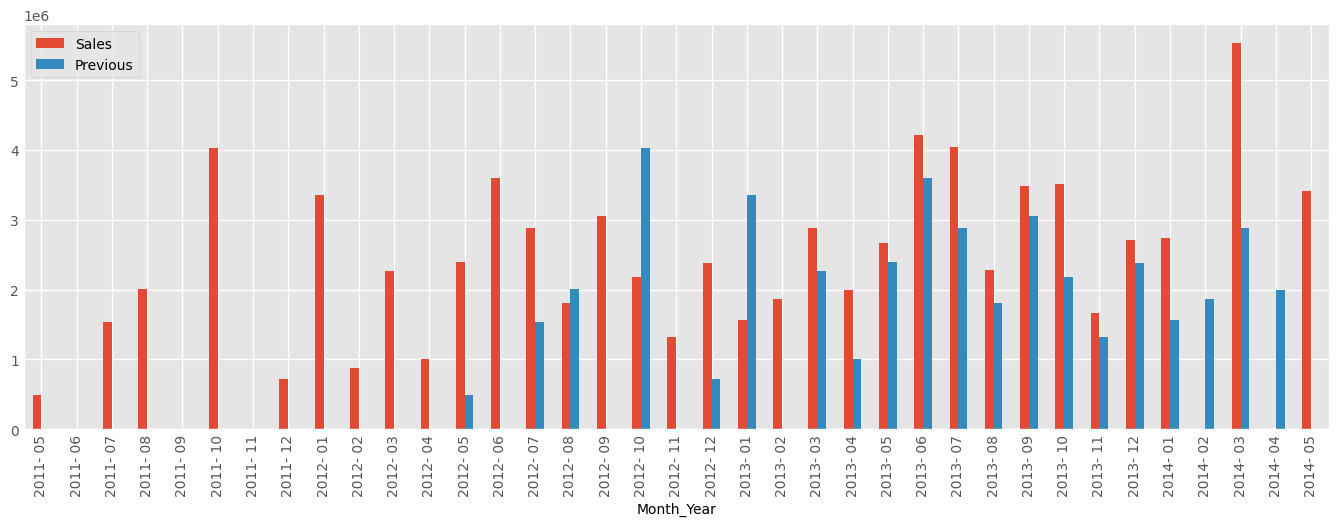

In [135]:
plt.style.use('ggplot')
new_df.plot(kind="bar", figsize=(15,5))

# 100 Stacked Chart by Country and Category

In [47]:
xdf_chart = xdf.groupby(['Country', 'productcategory']).sum()['Sales'].reset_index()
xdf_chart = pd.DataFrame(xdf_chart)
xdf_chart.head()

C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_18592\858276864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  xdf_chart = xdf.groupby(['Country', 'productcategory']).sum()['Sales'].reset_index()


,Country,productcategory,Sales
0,Australia,Accessories,"23,947.53"
1,Australia,Bikes,"1,323,820.73"
2,Australia,Clothing,"42,915.80"
3,Australia,Components,"203,651.31"
4,Canada,Accessories,"118,127.35"


In [48]:
cumsum = xdf_chart.groupby('Country').sum().groupby('Country').cumsum().reset_index()
cumsum

C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_18592\4224199885.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cumsum = xdf_chart.groupby('Country').sum().groupby('Country').cumsum().reset_index()


,Country,Sales
0,Australia,"1,594,335.37"
1,Canada,"14,377,925.59"
2,France,"4,607,537.93"
3,Germany,"1,983,988.04"
4,United Kingdom,"4,279,008.82"
5,United States,"53,607,801.20"


In [55]:
xdf_combined = pd.merge(xdf_chart, cumsum, on='Country')
xdf_combined

,Country,productcategory,Sales_x,Sales_y
0,Australia,Accessories,"23,947.53","1,594,335.37"
1,Australia,Bikes,"1,323,820.73","1,594,335.37"
2,Australia,Clothing,"42,915.80","1,594,335.37"
3,Australia,Components,"203,651.31","1,594,335.37"
4,Canada,Accessories,"118,127.35","14,377,925.59"
5,Canada,Bikes,"11,636,380.59","14,377,925.59"
6,Canada,Clothing,"378,947.63","14,377,925.59"
7,Canada,Components,"2,244,470.02","14,377,925.59"
8,France,Accessories,"48,031.73","4,607,537.93"
9,France,Bikes,"3,560,665.64","4,607,537.93"


In [56]:
xdf_combined['Sales_pr'] = xdf_combined['Sales_x'] /xdf_combined['Sales_y']
xdf_combined.drop(['Sales_x', 'Sales_y'] , axis=1, inplace=True)

In [59]:
xdf_combined.head()

,Country,productcategory,Sales_pr
0,Australia,Accessories,0.02
1,Australia,Bikes,0.83
2,Australia,Clothing,0.03
3,Australia,Components,0.13
4,Canada,Accessories,0.01


In [87]:
xdfp = pd.pivot_table(xdf_combined, values="Sales_pr", index=["Country"], columns='productcategory').reset_index()
xdfp

productcategory,Country,Accessories,Bikes,Clothing,Components
0,Australia,0.02,0.83,0.03,0.13
1,Canada,0.01,0.81,0.03,0.16
2,France,0.01,0.77,0.03,0.19
3,Germany,0.02,0.78,0.04,0.17
4,United Kingdom,0.01,0.80,0.03,0.17
5,United States,0.01,0.84,0.02,0.14


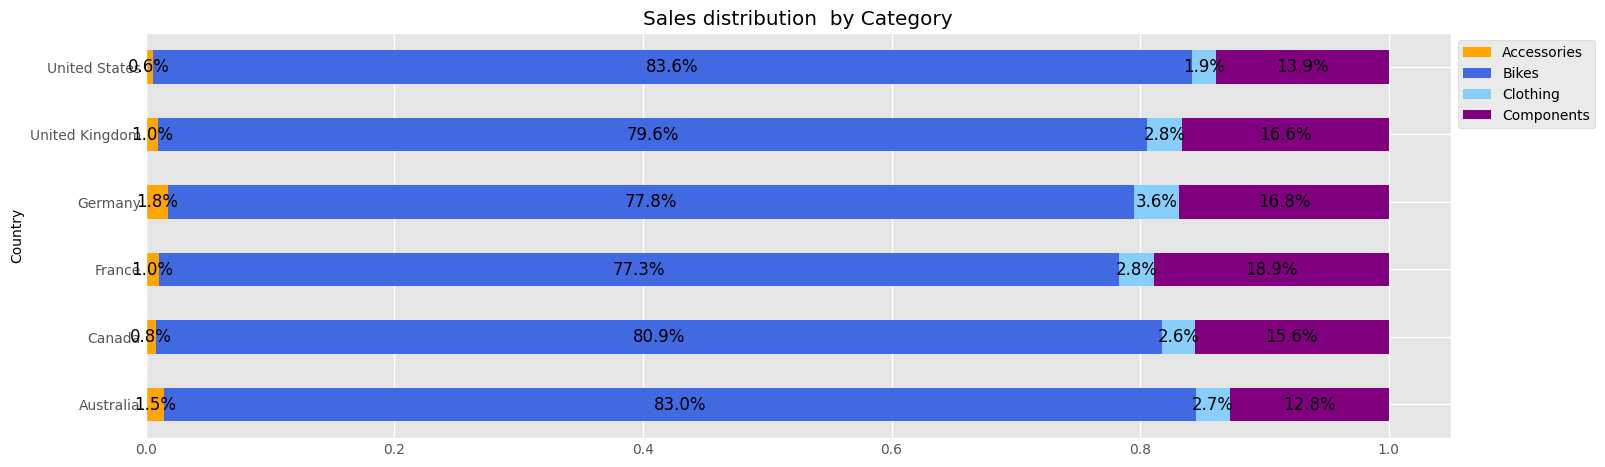

In [111]:
xdfp.plot(
x = "Country",
    kind="barh",
    stacked= True,
    figsize=(15,5),
    color=["orange", "royalblue", "lightskyblue", "purple"],
    title= "Sales distribution  by Category",
    mark_right= True
)
plt.legend(bbox_to_anchor=(1.0, 1.0))
#
xdf_total = xdfp["Accessories"] + xdfp["Bikes"] + xdfp["Clothing"] + xdfp["Components"] 
xdf_rel = xdfp[xdfp.columns[1:]].div(xdf_total, 0) * 100
#
for n in xdf_rel: 
    for i, (cs, ab, pc) in enumerate(zip(xdfp.iloc[:, 1:].cumsum(1)[n],  
                                         xdfp[n], xdf_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center',  fontsize = 12)